# <CENTER> PREMIER LEAGUE TRANSFERMARKT

<center>  <img src="https://bm23sportsreviews.files.wordpress.com/2018/08/premier-league-18-19.jpg" width="600"> <center> 
<i>Teams Premier League Season 18/19

In [1]:
#Librerias scraping
from bs4 import BeautifulSoup as bs
import requests
import re
import time
import pandas as pd

In [2]:
#url='https://www.transfermarkt.es/premier-league/transfers/wettbewerb/GB1'   ## url generico
url_fichajes_18_19='https://www.transfermarkt.es/premier-league/transfers/wettbewerb/GB1/plus/?saison_id=2018&s_w=&leihe=0&leihe=1&intern=0&intern=1'
url_fichajes_18_19_uk='https://www.transfermarkt.co.uk/premier-league/transfers/wettbewerb/GB1/saison_id/2018/s_w//leihe/1/intern/1/plus/'
url_fichajes_18_19_uk_solotransf='https://www.transfermarkt.co.uk/premier-league/transfers/wettbewerb/GB1/plus/?saison_id=2018&s_w=&leihe=0&intern=0&intern=1'

In [3]:
#Funcion para obtener soup
def soup_maker(url):
    headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
    r=requests.get(url, headers=headers)
    soup = bs(r.content, 'html.parser')
    return soup

In [177]:
soup = soup_maker(url_fichajes_18_19_uk)
print(soup.prettify())

<!DOCTYPE html>
<!-- paulirish.com/2008/conditional-stylesheets-vs-css-hacks-answer-neither/ -->
<!--[if IE 7]>
<html class="ie7 oldie" lang="en"> <![endif]-->
<!--[if IE 8]>
<html class="no-js lt-ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="x-ua-compatible"/>
  <meta content="telephone=no" name="format-detection"/>
  <meta content="#1a3151" name="theme-color">
   <link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
   <link href="/favicon-16x16.png" rel="shortcut icon" sizes="16x16"/>
   <link href="/android-chrome-192x192.png" rel="shortcut icon" sizes="192x192"/>
   <link href="/apple-touch-icon-152x152.png" rel="apple-touch-icon-precomposed"/>
   <link href="http://www.transfermarkt.de/premier-league/transfers/wettbewerb/GB1/saison_id/2018/s_w//leihe/1/intern/1/plus/" hreflang="x-default" rel="alternate">
    <link href="http://www.transferm

### Pruebas para obtener datos

In [5]:
boxes=soup.find_all('div',{'class':'box'}) #por cada pais

In [6]:
len(boxes)

26

In [7]:
#Manchester United
Manchester=boxes[4].find_all('div',{'class':'di nowrap'})
tr_Manchester=[]
for i,player in enumerate(Manchester):
    if i%2==0:
        tr_Manchester.append(player.text)
len(tr_Manchester)

39

In [8]:
boxes[4].find('div',{'class':'table-header'}).text

'Manchester City'

In [9]:
boxes[4].find('th',{'class':'spieler-transfer-cell'}).text

'In'

In [10]:
boxes[4].find('td',{'class':'zentriert alter-transfer-cell'}).text

'27'

In [11]:
paises=boxes[4].find('td',{'class':'zentriert nat-transfer-cell'}).find_all('img')
p_origen=[]
for pais in paises:
    p_origen.append(pais['title'])
pais=', '.join(p_origen)
pais

'Algeria, France'

In [12]:
boxes[4].find('td',{'class':'pos-transfer-cell'}).text

'Right Winger'

In [13]:
boxes[4].find('td',{'class':'kurzpos-transfer-cell zentriert'}).text

'RW'

In [14]:
boxes[4].find('td',{'class':'rechts mw-transfer-cell'}).text

'£45.00m'

In [15]:
boxes[4].find('td',{'class':'no-border-rechts zentriert'}).find('img')['alt']

'Leicester City'

In [16]:
boxes[4].find('td',{'class':'no-border-links verein-flagge-transfer-cell'}).find('img')['title']

'England'

In [17]:
boxes[4].find('td',{'class':'rechts '}).text

'£61.02m'

### Definiendo funciones

#### Extraer datos de un jugador

In [18]:
def extract_player_data(soup):
    player_data = {}
    #Nombre de equipo involucrado en las transacciones
    player_data['main_team']=soup.parent.parent.parent.parent.find('div',{'class':'table-header'}).text
    #nombre del jugador
    player_data['name'] = soup.find('div',{'class':'di nowrap'}).text
    #edad del jugador
    player_data['age']=soup.find('td',{'class':'zentriert alter-transfer-cell'}).text
    #nacionalidad del jugador
    paises=soup.find('td',{'class':'zentriert nat-transfer-cell'}).find_all('img')
    p_origen=[]
    for pais in paises:
        p_origen.append(pais['title'])
    player_data['nationality']=', '.join(p_origen)
    #posicion del jugador
    player_data['position']=soup.find('td',{'class':'kurzpos-transfer-cell zentriert'}).text
    #valor de mercado del jugador
    player_data['market_value']=soup.find('td',{'class':'rechts mw-transfer-cell'}).text
    #Equipo al que fue traspasado el jugador o el equipo del cual se realizo el traspaso a este equipo
    player_data['team_join_left']=soup.find('td',{'class':'no-border-rechts zentriert'}).find('img')['alt']
    # pais del club
    if soup.find('td',{'class':'no-border-links verein-flagge-transfer-cell'}).find('img'):
        player_data['team_country']=soup.find('td',{'class':'no-border-links verein-flagge-transfer-cell'}).find('img')['title']
    else:
        player_data['team_country']='-'
    #Costo de traspaso
    if soup.find('td',{'class':'rechts '}):
        player_data['fee']=soup.find('td',{'class':'rechts '}).text
    elif soup.find('td',{'class':'rechts bg_blau_20'}):
        player_data['fee']=soup.find('td',{'class':'rechts bg_blau_20'}).text
    #tipo de traspaso:  Entrada o Salida
    player_data['type_trade']=soup.parent.parent.find('th',{'class':'spieler-transfer-cell'}).text

    return (player_data)

#### Construir Dataframe de una tabla de jugadores

In [19]:
def build_bd_of_table(table_soup):
    database=pd.DataFrame()
    #Estructura dataframe
    p={'main_team': 'Fulham FC','name': 'David Button','age': '29','nationality': 'England','position': 'GK','market_value': '£1.35m',
 'team_join_left': 'Brighton & Hove Albion','team_country': 'England','fee': '£4.05m','type_trade': 'Out'}#un valor random de un jugador
    database = database.assign(**p) #asignar cabeceras de acuerdo al diccionario armado
    #Insertar dato a dato en Dataframe
    for x in range(1,len(table_soup)):
        data=extract_player_data(table_soup[x])
        database = database.append(data, ignore_index=True)
    return database

#### Construir dataframe de un equipo (club)

In [20]:
def bd_of_a_team(team_soup):
    
    #Contenido de una tabla por filas
    table_one=team_soup[0].find_all('tr')
    table_two=team_soup[1].find_all('tr')
    
    #Crear bds de ambas tablas
    df_one=build_bd_of_table(table_one)
    df_two=build_bd_of_table(table_two)
    
    #Unir dataframes
    merge=df_one.append(df_two, ignore_index=True,sort=False)
    
    return merge

#### Construcción de BD con todas las transferencias

In [30]:
def Bd_transfer(url):
    #transformar a soup
    url_soup=soup_maker(url)
    boxes=url_soup.find_all('div',{'class':'box'}) #soup por cada equipo
    every_table=boxes[4].find_all('div',{'class':'responsive-table'}) #cada tabla in - out
    #Generar dataframe
    DB_TRANSFERS=pd.DataFrame()
    #Estructura diccionario
    p={'main_team': 'Fulham FC','name': 'David Button','age': '29','nationality': 'England','position': 'GK','market_value': '£1.35m',
       'team_join_left': 'Brighton & Hove Albion','team_country': 'England','fee': '£4.05m','type_trade': 'Out'}#un valor random de un jugador
    #Asignar estructura a Dataframe
    DB_TRANSFERS = DB_TRANSFERS.assign(**p) #asignar cabeceras de acuerdo al diccionario armado
    #Unir los diferentes equipos en el dataframe
    for clubs in boxes: 
        if clubs.find_all('div',{'class':'responsive-table'})!=[]:
            every_table=clubs.find_all('div',{'class':'responsive-table'}) # soup de cada tabla in - out de un club
            temp=bd_of_a_team(every_table)
            DB_TRANSFERS = DB_TRANSFERS.append(temp, ignore_index=True,sort=False)
    return DB_TRANSFERS

In [31]:
DB_TRANSFERS_18_19=pd.DataFrame()
DB_TRANSFERS_18_19=Bd_transfer(url_fichajes_18_19_uk)
DB_TRANSFERS_18_19.head(10)

,main_team,name,age,nationality,position,market_value,team_join_left,team_country,fee,type_trade
0,Manchester City,Riyad Mahrez,27,"Algeria, France",RW,£45.00m,Leicester City,England,£61.02m,In
1,Manchester City,Ante Palaversa,18,Croatia,CM,£495k,HNK Hajduk Split,Croatia,£4.32m,In
2,Manchester City,Philippe Sandler,21,Netherlands,CB,£2.25m,PEC Zwolle,Netherlands,£2.25m,In
3,Manchester City,Ko Itakura,21,Japan,CB,£630k,Kawasaki Frontale,Japan,£990k,In
4,Manchester City,Daniel Arzani,19,"Australia, Iran",LW,£1.35m,Melbourne City FC,Australia,£801k,In
5,Manchester City,Jack Harrison,22,England,RW,£3.15m,Leeds United,England,NaN,In
6,Manchester City,Mix Diskerud,27,"United States, Norway",CM,£810k,IFK Göteborg,Sweden,"End of loanJul 15, 2018",In
7,Manchester City,Arijanet Murić,19,"Kosovo, Montenegro",GK,-,NAC Breda,Netherlands,"End of loanAug 22, 2018",In
8,Manchester City,Anthony Cáceres,26,"Australia, Uruguay",CM,£450k,Melbourne City FC,Australia,"End of loanDec 31, 2018",In
9,Manchester City,Arijanet Murić,19,"Kosovo, Montenegro",GK,-,Manchester City U23,England,-,In


In [32]:
DB_TRANSFERS_18_19.shape

(728, 10)

In [33]:
DB_TRANSFERS_18_19_no_loan=pd.DataFrame()
DB_TRANSFERS_18_19_no_loan=Bd_transfer(url_fichajes_18_19_uk_solotransf)
DB_TRANSFERS_18_19_no_loan.head(10)

,main_team,name,age,nationality,position,market_value,team_join_left,team_country,fee,type_trade
0,Manchester City,Riyad Mahrez,27,"Algeria, France",RW,£45.00m,Leicester City,England,£61.02m,In
1,Manchester City,Ante Palaversa,18,Croatia,CM,£495k,HNK Hajduk Split,Croatia,£4.32m,In
2,Manchester City,Philippe Sandler,21,Netherlands,CB,£2.25m,PEC Zwolle,Netherlands,£2.25m,In
3,Manchester City,Ko Itakura,21,Japan,CB,£630k,Kawasaki Frontale,Japan,£990k,In
4,Manchester City,Daniel Arzani,19,"Australia, Iran",LW,£1.35m,Melbourne City FC,Australia,£801k,In
5,Manchester City,Arijanet Murić,19,"Kosovo, Montenegro",GK,-,Manchester City U23,England,-,In
6,Manchester City,Brahim Díaz,19,"Spain, Morocco",LW,£4.50m,Real Madrid,Spain,£15.30m,Out
7,Manchester City,Angus Gunn,22,"England, Scotland",GK,£1.80m,Southampton FC,England,£10.17m,Out
8,Manchester City,Pablo Maffeo,20,Spain,RB,£9.00m,VfB Stuttgart,Germany,£8.10m,Out
9,Manchester City,Jason Denayer,23,"Belgium, DR Congo",CB,£2.70m,Olympique Lyon,France,£5.85m,Out


In [34]:
DB_TRANSFERS_18_19_no_loan.shape

(276, 10)

### Información

In [38]:
freq=pd.crosstab([DB_TRANSFERS_18_19.team_country],"count",rownames=['team_country'],colnames=['Frequency'])

df_filtered = freq.query('count>10')
data_fil=df_filtered.sort_values('count',ascending=True)
data_fil

Frequency,count
team_country,
Portugal,13
Turkey,16
Belgium,19
Netherlands,24
-,27
Italy,29
Scotland,30
France,37
Germany,41


In [39]:
data_fil.insert(0,'country_names',data_fil.index)
data_fil

Frequency,country_names,count
team_country,,
Portugal,Portugal,13
Turkey,Turkey,16
Belgium,Belgium,19
Netherlands,Netherlands,24
-,-,27
Italy,Italy,29
Scotland,Scotland,30
France,France,37
Germany,Germany,41


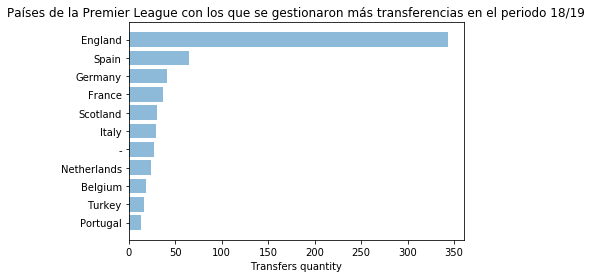

In [40]:
import matplotlib.pyplot as plt # Graficos

#plot
plt.barh(data_fil['country_names'], data_fil['count'], align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
plt.xlabel('Transfers quantity')
plt.title("Países de la Premier League con los que se gestionaron más transferencias en el periodo 18/19")


plt.show()

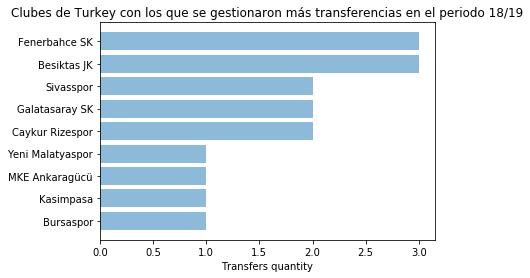

In [41]:
#Aproximacion por clubes de cada pais
country='Turkey'
exac=DB_TRANSFERS_18_19[DB_TRANSFERS_18_19['team_country']==country]
#crosstab
freq2=pd.crosstab([exac.team_join_left],"count",rownames=['team_join_left'],colnames=['Frequency'])
#filtrado
freq2= freq2.query('count>=0')
#sorting
data_fil2=freq2.sort_values('count',ascending=True)
data_fil2.insert(0,'team_join_left',data_fil2.index)
data_fil2
#plot
plt.barh(data_fil2['team_join_left'], data_fil2['count'], align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
plt.xlabel('Transfers quantity')
plt.title("Clubes de "+country+" con los que se gestionaron más transferencias en el periodo 18/19")

plt.show()

## <center> Scraping player's data

Se tomará las 10 ligas con las que se hace más transferencia para sacar los datos de cada uno de los jugadores. Cabe resaltar que de cada país será su liga de primera división

  <img src="https://media.cdnandroid.com/64/64/ff/00/imagen-transfermarkt-0big.jpg" width="600"> <center> 

In [175]:
import datetime
print('Extraido el: '+ str(datetime.datetime.now()))

Extraido el: 2019-06-18 22:42:12.469223


In [48]:
url_premier_league='https://www.transfermarkt.us/premier-league/startseite/wettbewerb/GB1/saison_id/2018'

### Pruebas para obtener links

In [51]:
soup_premier=soup_maker(url_premier_league)
print(soup_premier.prettify())

<!DOCTYPE html>
<!-- paulirish.com/2008/conditional-stylesheets-vs-css-hacks-answer-neither/ -->
<!--[if IE 7]>
<html class="ie7 oldie" lang="en"> <![endif]-->
<!--[if IE 8]>
<html class="no-js lt-ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="x-ua-compatible"/>
  <meta content="telephone=no" name="format-detection"/>
  <meta content="#1a3151" name="theme-color">
   <link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
   <link href="/favicon-16x16.png" rel="shortcut icon" sizes="16x16"/>
   <link href="/android-chrome-192x192.png" rel="shortcut icon" sizes="192x192"/>
   <link href="/apple-touch-icon-152x152.png" rel="apple-touch-icon-precomposed"/>
   <link href="http://www.transfermarkt.de/premier-league/startseite/wettbewerb/GB1/saison_id/2018" hreflang="x-default" rel="alternate">
    <link href="http://www.transfermarkt.de/premier-league/star

In [58]:
#La tabla de equipos esta dividida en odd y even (html)
odds_teams=soup_premier.find('table',{"class":"items"}).find_all('tr',{'class':'odd'})
even_teams=soup_premier.find('table',{"class":"items"}).find_all('tr',{'class':'even'})

In [70]:
odds_teams[0].find('td',{'class':'hauptlink no-border-links show-for-small show-for-pad'}).find('a')

<a class="vereinprofil_tooltip" href="/manchester-city/startseite/verein/281/saison_id/2018" id="281">Man City</a>

In [71]:
test=odds_teams[0].find('td',{'class':'hauptlink no-border-links show-for-small show-for-pad'}).find('a')['href']
test

'/manchester-city/startseite/verein/281/saison_id/2018'

In [69]:
odds_teams[0].find('td',{'class':'hauptlink no-border-links show-for-small show-for-pad'}).find('a').text

'Man City'

In [72]:
#URL real : https://www.transfermarkt.us/manchester-city/startseite/verein/281/saison_id/2018
team_url='https://www.transfermarkt.us'+test
team_url

'https://www.transfermarkt.us/manchester-city/startseite/verein/281/saison_id/2018'

### Obtener links de equipos de una liga

In [185]:
def get_url_teams(soup_league):
    #get soup
    #soup_league=soup_maker(url_league)
    
    #La tabla de equipos esta dividida en odd y even (html)
    odds_teams=soup_league.find('table',{"class":"items"}).find_all('tr',{'class':'odd'})
    even_teams=soup_league.find('table',{"class":"items"}).find_all('tr',{'class':'even'})

    url_teams_league=[]
    for team in odds_teams:
        #encontrar link del equipo
        temp=team.find('td',{'class':'hauptlink no-border-links show-for-small show-for-pad'}).find('a')['href']
        #URL real : https://www.transfermarkt.us/manchester-city/startseite/verein/281/saison_id/2018
        link='https://www.transfermarkt.us'+temp
        url_teams_league.append(link)

    for team in even_teams:    
        temp=team.find('td',{'class':'hauptlink no-border-links show-for-small show-for-pad'}).find('a')['href']
        link='https://www.transfermarkt.us'+temp
        url_teams_league.append(link)
    
    #ENCONTRAR LINK DE DETALLE
    url_detail=[]
    for link in url_teams_league:
        soup_teams=soup_maker(link)
        #Buscar link de detalle
        det_link=soup_teams.find('div',{"class":"kartei-button-bar"}).find_all('a')[1]['href']
        #URL real de detalle : https://www.transfermarkt.us/manchester-city/kader/verein/281/saison_id/2018/plus/1
        new_link='https://www.transfermarkt.us'+det_link
        url_detail.append(new_link)
        #Sleep 2 sec
        time.sleep(10)
    
    return url_detail

In [168]:
teams_links=get_url_teams(url_premier_league)
teams_links

['https://www.transfermarkt.us/manchester-city/kader/verein/281/saison_id/2018/plus/1',
 'https://www.transfermarkt.us/chelsea-fc/kader/verein/631/saison_id/2018/plus/1',
 'https://www.transfermarkt.us/manchester-united/kader/verein/985/saison_id/2018/plus/1',
 'https://www.transfermarkt.us/everton-fc/kader/verein/29/saison_id/2018/plus/1',
 'https://www.transfermarkt.us/west-ham-united/kader/verein/379/saison_id/2018/plus/1',
 'https://www.transfermarkt.us/afc-bournemouth/kader/verein/989/saison_id/2018/plus/1',
 'https://www.transfermarkt.us/southampton-fc/kader/verein/180/saison_id/2018/plus/1',
 'https://www.transfermarkt.us/newcastle-united/kader/verein/762/saison_id/2018/plus/1',
 'https://www.transfermarkt.us/burnley-fc/kader/verein/1132/saison_id/2018/plus/1',
 'https://www.transfermarkt.us/huddersfield-town/kader/verein/1110/saison_id/2018/plus/1',
 'https://www.transfermarkt.us/liverpool-fc/kader/verein/31/saison_id/2018/plus/1',
 'https://www.transfermarkt.us/tottenham-hotsp

### Prueba para obtener datos de un jugador

In [97]:
soup_team=soup_maker(teams_links[0])
print(soup_team.prettify())

<!DOCTYPE html>
<!-- paulirish.com/2008/conditional-stylesheets-vs-css-hacks-answer-neither/ -->
<!--[if IE 7]>
<html class="ie7 oldie" lang="en"> <![endif]-->
<!--[if IE 8]>
<html class="no-js lt-ie9" lang="en"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="x-ua-compatible"/>
  <meta content="telephone=no" name="format-detection"/>
  <meta content="#1a3151" name="theme-color">
   <link href="/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
   <link href="/favicon-16x16.png" rel="shortcut icon" sizes="16x16"/>
   <link href="/android-chrome-192x192.png" rel="shortcut icon" sizes="192x192"/>
   <link href="/apple-touch-icon-152x152.png" rel="apple-touch-icon-precomposed"/>
   <link href="http://www.transfermarkt.de/manchester-city/kader/verein/281/saison_id/2018/plus/1" hreflang="x-default" rel="alternate">
    <link href="http://www.transfermarkt.de/manchester-city/kade

In [139]:
table=soup_team.find('div',{'class':'responsive-table'})
table_odd=table.find_all('tr',{'class':'odd'})
table_even=table.find_all('tr',{'class':'even'})


In [156]:
table_odd[0].parent.parent.parent.parent.parent.find('div',{'class':'table-header'}).text.strip().replace(u'Squad ', u'')

'Manchester City'

In [106]:
table_odd[0].find('div',{'class':'rn_nummer'}).text

'31'

In [105]:
table_odd[0].find('div',{'class':'di nowrap'}).text

'Ederson'

In [111]:
position=table_odd[0].find('table',{'class':'inline-table'}).find_all('td')
position[len(position)-1].text

'Goalkeeper'

In [123]:
table_odd[0].find_all('td',{'class':'zentriert'})

[<td class="zentriert rueckennummer bg_Torwart" title="Goalkeeper"><div class="rn_nummer">31</div></td>,
 <td class="zentriert">Aug 17, 1993 (25)</td>,
 <td class="zentriert"><img alt="Brazil" class="flaggenrahmen" src="https://tmssl.akamaized.net//images/flagge/verysmall/26.png?lm=1520611569" title="Brazil"/><br/><img alt="Portugal" class="flaggenrahmen" src="https://tmssl.akamaized.net//images/flagge/verysmall/136.png?lm=1520611569" title="Portugal"/></td>,
 <td class="zentriert">1,88 m</td>,
 <td class="zentriert">left</td>,
 <td class="zentriert">Jul 1, 2017</td>,
 <td class="zentriert"><a class="vereinprofil_tooltip" href="/benfica-lissabon/startseite/verein/294/saison_id/2017" id="294"><img alt="SL Benfica" class="" src="https://tmssl.akamaized.net//images/wappen/verysmall/294.png?lm=1535908439" title=": Ablöse $45.60m"/></a></td>,
 <td class="zentriert">30.06.2025</td>]

In [119]:
tempo=table_odd[0].find_all('td',{'class':'zentriert'})[1].text
re.split(r'[()]',tempo)

['Aug 17, 1993 ', '25', '']

In [124]:
nation=table_odd[0].find_all('td',{'class':'zentriert'})[2].find_all('img')
p_origen=[]
for pais in nation:
    p_origen.append(pais['title'])
', '.join(p_origen)

'Brazil, Portugal'

In [126]:
table_odd[0].find_all('td',{'class':'zentriert'})[3].text

'1,88 m'

In [127]:
table_odd[0].find_all('td',{'class':'zentriert'})[4].text

'left'

In [128]:
table_odd[0].find_all('td',{'class':'zentriert'})[5].text

'Jul 1, 2017'

In [131]:
table_odd[0].find_all('td',{'class':'zentriert'})[6].find('img')['alt']

'SL Benfica'

In [132]:
table_odd[0].find_all('td',{'class':'zentriert'})[7].text

'30.06.2025'

In [138]:
table_odd[0].find('td',{'class':'rechts hauptlink'}).text.replace(u'\xa0', u'')

'$79.80m'

### Obtener datos de un jugador

In [183]:
def extrac_player_atrib(table_soup):
    player_data = {}
    #Equipo_actual
    player_data['current_team']=table_soup.parent.parent.parent.parent.parent.find('div',{'class':'table-header'}).text.strip().replace(u'Squad ', u'')
    #Nombre del jugador
    player_data['name']=table_soup.find('div',{'class':'di nowrap'}).text
    #Numero de camiseta del jugador
    player_data['jersey_num']=table_soup.find('div',{'class':'rn_nummer'}).text
    #Posición del jugador
    position=table_soup.find('table',{'class':'inline-table'}).find_all('td')
    player_data['position']=position[len(position)-1].text
    ####Edad y fecha_nac
    tempo=table_soup.find_all('td',{'class':'zentriert'})[1].text
    #Fecha de nacimiento del jugador
    player_data['birthdate']=re.split(r'[()]',tempo)[0]
    #Edad del jugador
    player_data['age']=re.split(r'[()]',tempo)[1]
    #Nacionalidad
    nation=table_soup.find_all('td',{'class':'zentriert'})[2].find_all('img')
    p_origen=[]
    for pais in nation:
        p_origen.append(pais['title'])
    player_data['nationality']=', '.join(p_origen)
    #Altura
    player_data['height']=table_soup.find_all('td',{'class':'zentriert'})[3].text
    #Mejor pie
    player_data['foot']=table_soup.find_all('td',{'class':'zentriert'})[4].text
    #Fecha que se unio al club
    player_data['joined']=table_soup.find_all('td',{'class':'zentriert'})[5].text
    #Club del cual se separo
    if table_soup.find_all('td',{'class':'zentriert'})[6].find('img'):
        player_data['signed_from']=table_soup.find_all('td',{'class':'zentriert'})[6].find('img')['alt']
    else:
        player_data['signed_from']=''
    #Fecha fin de contrato
    player_data['contract_until']=table_soup.find_all('td',{'class':'zentriert'})[7].text
    #Valor de mercado
    player_data['market_value']=table_soup.find('td',{'class':'rechts hauptlink'}).text.replace(u'\xa0', u'')
    return (player_data)

In [160]:
extrac_player_atrib(table_odd[0])

{'current_team': 'Manchester City',
 'name': 'Ederson',
 'jersey_num': '31',
 'position': 'Goalkeeper',
 'birthdate': 'Aug 17, 1993 ',
 'age': '25',
 'nationality': 'Brazil, Portugal',
 'height': '1,88 m',
 'foot': 'left',
 'joined': 'Jul 1, 2017',
 'signed_from': 'SL Benfica',
 'contract_until': '30.06.2025',
 'market_value': '$79.80m'}

In [164]:
def dataframe_club(url_team):
    #convertir link de un equipo en soup
    soup_team=soup_maker(url_team)
    #buscar tabla de datos 
    table=soup_team.find('div',{'class':'responsive-table'})
    #Definir tablas odd y even donde se encuentran distribuidos los datos
    table_odd=table.find_all('tr',{'class':'odd'})
    table_even=table.find_all('tr',{'class':'even'})

    #Generar dataframe
    DB_CLUB=pd.DataFrame()
    #Estructura diccionario
    p={'current_team': 'Manchester City','name': 'Ederson','jersey_num': '31','position': 'Goalkeeper','birthdate': 'Aug 17, 1993 ',
    'age': '25','nationality': 'Brazil, Portugal','height': '1,88 m','foot': 'left','joined': 'Jul 1, 2017','signed_from': 'SL Benfica',
    'contract_until': '30.06.2025','market_value': '$79.80m'}#un valor random de un jugador
    #Asignar estructura a Dataframe
    DB_CLUB = DB_CLUB.assign(**p) #asignar cabeceras de acuerdo al diccionario armado
    for dato in table_odd:
        data=extrac_player_atrib(dato)
        DB_CLUB = DB_CLUB.append(data, ignore_index=True)

    for dato in table_even:
        data=extrac_player_atrib(dato)
        DB_CLUB = DB_CLUB.append(data, ignore_index=True)

    return DB_CLUB    

In [187]:
def bd_league(url_league):
    #get soup
    soup_league=soup_maker(url_league)
    #obtener links de los clubes
    club_links=get_url_teams(soup_league)
    #Generar dataframe
    DB_LEAGUE=pd.DataFrame()
    #Estructura diccionario
    p={'current_team': 'Manchester City','name': 'Ederson','jersey_num': '31','position': 'Goalkeeper','birthdate': 'Aug 17, 1993 ',
    'age': '25','nationality': 'Brazil, Portugal','height': '1,88 m','foot': 'left','joined': 'Jul 1, 2017','signed_from': 'SL Benfica',
    'contract_until': '30.06.2025','market_value': '$79.80m'}#un valor random de un jugador
    #Asignar estructura a Dataframe
    DB_LEAGUE = DB_LEAGUE.assign(**p) #asignar cabeceras de acuerdo al diccionario armado

    for club in club_links:
        time.sleep(10)
        club_df=dataframe_club(club)
        DB_LEAGUE=DB_LEAGUE.append(club_df,ignore_index=True,sort=False)
                        
    return DB_LEAGUE

# <center> Generar Bases de Datos

### <center><i>Data Premier League - ENGLAND
  <img src="Proyecto/Premier_League_data.jpg" width="1000"> <center> 

In [196]:
now=time.time()
premier_league=bd_league(url_premier_league)
time.time()-now

546.4311032295227

In [197]:
premier_league

,current_team,name,jersey_num,position,birthdate,age,nationality,height,foot,joined,signed_from,contract_until,market_value
0,Manchester City,Ederson,31,Goalkeeper,"Aug 17, 1993",25,"Brazil, Portugal","1,88 m",left,"Jul 1, 2017",SL Benfica,30.06.2025,$79.80m
1,Manchester City,Arijanet Murić,49,Goalkeeper,"Nov 7, 1998",20,"Kosovo, Montenegro","1,98 m",right,"Jul 1, 2018",Manchester City U23,30.06.2021,$2.28m
2,Manchester City,John Stones,5,Centre-Back,"May 28, 1994",25,England,"1,88 m",right,"Aug 9, 2016",Everton FC,30.06.2022,$68.40m
3,Manchester City,Eliaquim Mangala,15,Centre-Back,"Feb 13, 1991",28,"France, Belgium","1,87 m",left,"Aug 11, 2014",FC Porto,30.06.2020,$11.40m
4,Manchester City,Philippe Sandler,34,Centre-Back,"Feb 10, 1997",22,Netherlands,"1,90 m",right,"Jul 31, 2018",PEC Zwolle,30.06.2022,$2.85m
5,Manchester City,Oleksandr Zinchenko,35,Left-Back,"Dec 15, 1996",22,Ukraine,"1,75 m",left,"Jul 4, 2016",FK Ufa,30.06.2020,$22.80m
6,Manchester City,Danilo,3,Right-Back,"Jul 15, 1991",27,Brazil,"1,84 m",right,"Jul 23, 2017",Real Madrid,30.06.2022,$22.80m
7,Manchester City,Ilkay Gündogan,8,Central Midfield,"Oct 24, 1990",28,Germany,"1,80 m",right,"Jul 1, 2016",Borussia Dortmund,30.06.2020,$57.00m
8,Manchester City,Fabian Delph,18,Central Midfield,"Nov 21, 1989",29,"England, Guyana","1,74 m",left,"Jul 17, 2015",Aston Villa,30.06.2020,$17.10m
9,Manchester City,David Silva,21,Attacking Midfield,"Jan 8, 1986",33,Spain,"1,70 m",left,"Jul 14, 2010",Valencia CF,30.06.2020,$22.80m


### <center><i>Data La Liga - SPAIN
  <img src="Proyecto/La_Liga_data.jpg" width="1000"> <center> 

In [181]:
url_laliga='https://www.transfermarkt.us/jumplist/startseite/wettbewerb/ES1'

In [189]:
la_liga=bd_league(url_laliga)
la_liga

,current_team,name,jersey_num,position,birthdate,age,nationality,height,foot,joined,signed_from,contract_until,market_value
0,FC Barcelona,Marc-André ter Stegen,1,Goalkeeper,"Apr 30, 1992",27,Germany,"1,87 m",right,"Jul 1, 2014",Borussia Mönchengladbach,30.06.2022,$102.60m
1,FC Barcelona,Clément Lenglet,15,Centre-Back,"Jun 17, 1995",24,France,"1,86 m",left,"Jul 12, 2018",Sevilla FC,30.06.2023,$68.40m
2,FC Barcelona,Gerard Piqué,3,Centre-Back,"Feb 2, 1987",32,Spain,"1,92 m",right,"Jul 1, 2008",Manchester United,30.06.2022,$39.90m
3,FC Barcelona,Jean-Clair Todibo,6,Centre-Back,"Dec 30, 1999",19,"France, French Guiana","1,89 m",right,"Jan 31, 2019",FC Toulouse,30.06.2023,$9.12m
4,FC Barcelona,Jordi Alba,18,Left-Back,"Mar 21, 1989",30,Spain,"1,70 m",left,"Jul 1, 2012",Valencia CF,30.06.2024,$57.00m
5,FC Barcelona,Nélson Semedo,2,Right-Back,"Nov 16, 1993",25,Portugal,"1,77 m",right,"Jul 14, 2017",SL Benfica,30.06.2022,$45.60m
6,FC Barcelona,Arthur,8,Central Midfield,"Aug 12, 1996",22,Brazil,"1,72 m",right,"Jul 9, 2018",Grêmio Foot-Ball Porto Alegrense,30.06.2024,$79.80m
7,FC Barcelona,Carles Aleñà,21,Central Midfield,"Jan 5, 1998",21,Spain,"1,80 m",left,"Dec 4, 2018",FC Barcelona B,30.06.2022,$34.20m
8,FC Barcelona,Arturo Vidal,22,Central Midfield,"May 22, 1987",32,Chile,"1,80 m",right,"Aug 6, 2018",Bayern Munich,30.06.2021,$17.10m
9,FC Barcelona,Philippe Coutinho,7,Left Winger,"Jun 12, 1992",27,"Brazil, Portugal","1,72 m",right,"Jan 6, 2018",Liverpool FC,30.06.2023,$102.60m


### <center><i>Data Bundesliga - GERMANY
<img src="Proyecto/Bundesliga_data.jpg" width="1000"> <center> 

In [199]:
url_bundesliga='https://www.transfermarkt.us/jumplist/startseite/wettbewerb/L1'

In [200]:
bundesliga=bd_league(url_bundesliga)
bundesliga

,current_team,name,jersey_num,position,birthdate,age,nationality,height,foot,joined,signed_from,contract_until,market_value
0,Bayern Munich,Manuel Neuer,1,Goalkeeper,"Mar 27, 1986",33,Germany,"1,93 m",right,"Jul 1, 2011",FC Schalke 04,30.06.2021,$20.52m
1,Bayern Munich,Christian Früchtl,36,Goalkeeper,"Jan 28, 2000",19,Germany,"1,93 m",left,"Jul 1, 2017",FC Bayern Munich U19,30.06.2020,$570k
2,Bayern Munich,Niklas Süle,4,Centre-Back,"Sep 3, 1995",23,Germany,"1,95 m",right,"Jul 1, 2017",TSG 1899 Hoffenheim,30.06.2022,$68.40m
3,Bayern Munich,Jérôme Boateng,17,Centre-Back,"Sep 3, 1988",30,Germany,"1,92 m",right,"Jul 14, 2011",Manchester City,30.06.2021,$22.80m
4,Bayern Munich,Joshua Kimmich,32,Right-Back,"Feb 8, 1995",24,Germany,"1,76 m",right,"Jul 2, 2015",VfB Stuttgart,30.06.2023,$79.80m
5,Bayern Munich,Javi Martínez,8,Defensive Midfield,"Sep 2, 1988",30,Spain,"1,90 m",right,"Aug 29, 2012",Athletic Bilbao,30.06.2021,$30.78m
6,Bayern Munich,Leon Goretzka,18,Central Midfield,"Feb 6, 1995",24,Germany,"1,89 m",right,"Jul 1, 2018",FC Schalke 04,30.06.2022,$57.00m
7,Bayern Munich,Renato Sanches,35,Central Midfield,"Aug 18, 1997",21,"Portugal, Sao Tome and Principe","1,76 m",right,"Jul 1, 2016",SL Benfica,30.06.2021,$20.52m
8,Bayern Munich,Meritan Shabani,37,Attacking Midfield,"Mar 15, 1999",20,Germany,"1,85 m",right,-,,30.06.2020,$399k
9,Bayern Munich,Alphonso Davies,19,Left Winger,"Nov 2, 2000",18,"Canada, Liberia","1,81 m",left,"Jan 1, 2019",Vancouver Whitecaps FC,30.06.2023,$11.40m


### <center><i>Data Ligue 1 - FRANCE
<img src="Proyecto/Ligue_1_data.jpg" width="1000"> <center> 

In [201]:
url_ligue1='https://www.transfermarkt.us/jumplist/startseite/wettbewerb/FR1'

In [202]:
ligue_1=bd_league(url_ligue1)
ligue_1

,current_team,name,jersey_num,position,birthdate,age,nationality,height,foot,joined,signed_from,contract_until,market_value
0,Paris Saint-Germain,Alphonse Areola,16,Goalkeeper,"Feb 27, 1993",26,"France, Philippines","1,95 m",right,"Jul 1, 2010",Paris Saint-Germain U19,30.06.2023,$19.95m
1,Paris Saint-Germain,Sébastien Cibois,40,Goalkeeper,"Mar 2, 1998",21,France,"1,92 m",right,"Jan 1, 2018",FC Paris Saint-Germain B,30.06.2021,$285k
2,Paris Saint-Germain,Thilo Kehrer,4,Centre-Back,"Sep 21, 1996",22,"Germany, Burundi","1,86 m",right,"Aug 16, 2018",FC Schalke 04,30.06.2023,$39.90m
3,Paris Saint-Germain,Thiago Silva,2,Centre-Back,"Sep 22, 1984",34,"Brazil, France","1,83 m",right,"Jul 14, 2012",AC Milan,30.06.2020,$11.40m
4,Paris Saint-Germain,Layvin Kurzawa,20,Left-Back,"Sep 4, 1992",26,"France, Poland","1,82 m",left,"Aug 27, 2015",AS Monaco,30.06.2020,$19.95m
5,Paris Saint-Germain,Stanley N'Soki,34,Left-Back,"Apr 9, 1999",20,"France, Congo","1,78 m",left,"Jul 1, 2018",FC Paris Saint-Germain B,30.06.2021,$9.69m
6,Paris Saint-Germain,Colin Dagba,31,Right-Back,"Sep 6, 1998",20,"France, Benin","1,70 m",right,"Jul 1, 2018",FC Paris Saint-Germain B,30.06.2023,$13.68m
7,Paris Saint-Germain,Leandro Paredes,8,Defensive Midfield,"Jun 29, 1994",24,Argentina,"1,80 m",right,"Jan 29, 2019",Zenit St. Petersburg,30.06.2023,$39.90m
8,Paris Saint-Germain,Adrien Rabiot,25,Central Midfield,"Apr 3, 1995",24,France,"1,88 m",left,"Jul 1, 2012",Paris Saint-Germain U19,30.06.2019,$39.90m
9,Paris Saint-Germain,Julian Draxler,23,Attacking Midfield,"Sep 20, 1993",25,Germany,"1,87 m",right,"Jan 3, 2017",VfL Wolfsburg,30.06.2021,$39.90m


### <center><i>Data Scottish Premiership - FRANCE
<img src="Proyecto/Scottish_Premiership_data.jpg" width="1000"> <center> 


In [205]:
url_scot_prem='https://www.transfermarkt.us/jumplist/startseite/wettbewerb/SC1'

In [206]:
scottish_premiership=bd_league(url_scot_prem)
scottish_premiership

,current_team,name,jersey_num,position,birthdate,age,nationality,height,foot,joined,signed_from,contract_until,market_value
0,Celtic FC,Craig Gordon,1,Goalkeeper,"Dec 31, 1982",36,Scotland,"1,93 m",right,"Jul 3, 2014",Career break,31.05.2020,$2.28m
1,Celtic FC,Dorus de Vries,24,Goalkeeper,"Dec 29, 1980",38,Netherlands,"1,91 m",right,"Aug 13, 2016",Nottingham Forest,31.05.2019,$399k
2,Celtic FC,Jozo Simunovic,5,Centre-Back,"Aug 4, 1994",24,"Bosnia-Herzegovina, Croatia","1,91 m",right,"Sep 1, 2015",GNK Dinamo Zagreb,31.05.2021,$3.71m
3,Celtic FC,Kristoffer Ajer,35,Centre-Back,"Apr 17, 1998",21,Norway,"1,96 m",right,"Jul 1, 2016",IK Start,31.05.2022,$2.28m
4,Celtic FC,Marvin Compper,33,Centre-Back,"Jun 14, 1985",34,"Germany, France","1,85 m",left,"Jan 1, 2018",RB Leipzig,31.05.2020,$855k
5,Celtic FC,Emilio Izaguirre,3,Left-Back,"May 10, 1986",33,Honduras,"1,77 m",left,"Aug 10, 2018",Al-Feiha FC,30.06.2019,$1.14m
6,Celtic FC,Jeremy Toljan,2,Right-Back,"Aug 8, 1994",24,"Germany, United States","1,82 m",right,"Jan 31, 2019",Borussia Dortmund,30.06.2019,$3.42m
7,Celtic FC,Cristian Gamboa,12,Right-Back,"Oct 24, 1989",29,Costa Rica,"1,75 m",right,"Aug 30, 2016",West Bromwich Albion,31.05.2019,$855k
8,Celtic FC,Nir Bitton,6,Defensive Midfield,"Oct 30, 1991",27,Israel,"1,96 m",right,"Aug 30, 2013",FC Ashdod,31.05.2020,$2.28m
9,Celtic FC,Youssouf Mulumbu,-,Defensive Midfield,"Jan 25, 1987",32,"DR Congo, France","1,77 m",right,"Aug 31, 2018",Kilmarnock FC,30.06.2020,$855k


## SAVE DATABASES

In [210]:
#Guardar BDs en CSV
premier_league.to_csv('Proyecto/premier_league.csv',index=False,encoding='UTF-16')
la_liga.to_csv('Proyecto/la_liga.csv',index=False,encoding='UTF-16')
bundesliga.to_csv('Proyecto/bundesliga.csv',index=False,encoding='UTF-16')
ligue_1.to_csv('Proyecto/ligue_1.csv',index=False,encoding='UTF-16')
scottish_premiership.to_csv('Proyecto/scottish_premiership.csv',index=False,encoding='UTF-16')